Importando librerias

In [6]:
import sys
import os

# Subir un nivel desde 'tests/' a la carpeta 'proyecto/'
project_path = os.path.abspath("..")
sys.path.insert(0, project_path)

from RawSignal import RawSignal
from Info import Info
from Anotations import Anotaciones
import numpy as np



Cargamos la señal

In [8]:
eeg_data = np.load("../data/eeg/eeg_signal.np")


In [9]:
print("Forma de la señal de EEG:", eeg_data.shape)  # Debería mostrar (62, 388047) 

Forma de la señal de EEG: (62, 388047)


Creamos objeto info 

In [10]:
sfreq = 512.0
ch_names = ['FP1', 'FPz', 'FP2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz',
            'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6',
            'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3',
            'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2',
            'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'F9', 'F10']

info = Info(ch_names=ch_names, sfreq=sfreq, ch_types= "EEG")

In [11]:
info.pretty()

,Clave,Valor
0,ch_names,"[FP1, FPz, FP2, AF7, AF3, AF4, AF8, F7, F5, F3..."
1,sfreq,512.0
2,description,No data
3,experimenter,No data
4,subject_info,No data
5,bads,[]
6,ch_types,"[EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG, ..."


Creamos objeto anotaciones

In [12]:
anotaciones= Anotaciones()

In [13]:
anotaciones.load(r"C:\Users\Usuario\Desktop\7mo\Programación\TIF\proyecto\data\eeg\eventos_ejemplo.csv")

In [14]:
print(anotaciones)

    Unnamed: 0       onset  duration   event_id
0            0   37.548828         5  IZQUIERDA
1            1   54.048828         5    DERECHA
2            2   70.482422         5    DERECHA
3            3   88.632812         5    DERECHA
4            4  104.984375         5  IZQUIERDA
5            5  122.300781         5  IZQUIERDA
6            6  140.085938         5    DERECHA
7            7  157.287109         5    DERECHA
8            8  173.853516         5    DERECHA
9            9  190.685547         5    DERECHA
10          10  207.953125         5    DERECHA
11          11  224.320312         5  IZQUIERDA
12          12  242.087891         5  IZQUIERDA
13          13  258.921875         5  IZQUIERDA
14          14  277.089844         5  IZQUIERDA
15          15  294.857422         5  IZQUIERDA
16          16  312.341797         5    DERECHA
17          17  329.591797         5  IZQUIERDA
18          18  347.226562         5    DERECHA
19          19  364.794922         5  IZ

Creamos objeto RawSignal

In [15]:
eeg_raw = RawSignal(data=eeg_data, sfreq=sfreq, info=info,anotaciones=anotaciones)

In [16]:
print(eeg_raw)

<RawSignal | 62 canales × 388047 muestras, sfreq=512.0 Hz, first_samp=0>


Probando metodo get_data

In [17]:
segmento = eeg_raw.get_data(start=2, stop=4)  # de 2 a 4 segundos
print(segmento.shape)  # debería ser (62, muestras entre 2s y 4s → 2*512 = 1024)

segmento2= eeg_raw.get_data(picks="C3",start=1,stop=2)
print(segmento2.shape) #Deberia ser (1, muestras entre 1s y 2s → 1*512=512 )

segmento3= eeg_raw.get_data(picks=["C3","C4"],start=1,stop=5)
print(segmento3.shape) #Deberia ser (2,muestras entre 1s y 5s → 4*512= 2048)

data, times = eeg_raw.get_data(times=True) 
print(data.shape) #Deberia ser (62, y el total de muestras 388047)
print(times.shape) #Deberia ser el total de muestras 388047

data_filtered = eeg_raw.get_data(reject=20000)# Obtener todos los datos , eliminando aquellos canales que superen los 20000uV
print(data_filtered.shape)

(62, 1024)


(1, 512)
(2, 2048)
(62, 388047)
(388047,)
(17, 388047)


Probando metodo drop_channels

In [18]:
new_signal = eeg_raw.drop_channels(['FP1'])
print(new_signal.data.shape) ## shape -> (61, 388047)
print("Canales restantes:", new_signal.info['ch_names'])


(61, 388047)
Canales restantes: ['FPz', 'FP2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'F9', 'F10']


Probando metodo crop

In [19]:
eeg_cropped = eeg_raw.crop(tin= 40,tf=100)
print(eeg_cropped.anotaciones)


       onset  duration description
0  14.048828         5     DERECHA
1  30.482422         5     DERECHA
2  48.632812         5     DERECHA


Probando metodo describe

In [20]:
eeg_raw.describe()

,name,type,min,Q1,mediana,Q3,max
0,FP1,EEG,-8707.160156,-7.417814,0.036089,7.569032,24475.962891
1,FPz,EEG,-7117.736328,-4.250395,0.011847,4.314002,20024.503906
2,FP2,EEG,-7099.595703,-5.601849,0.064424,5.865489,20075.072266
3,AF7,EEG,-12618.859375,-12.632099,0.535278,13.503281,35234.156250
4,AF3,EEG,-9001.718750,-5.207978,0.015482,5.290213,25327.796875
...,...,...,...,...,...,...,...
57,O1,EEG,-10155.270508,-5.439233,-0.070252,5.353601,28699.048828
58,Oz,EEG,-9585.705078,-5.124704,-0.090171,5.043318,27103.341797
59,O2,EEG,-9334.907227,-5.106302,-0.058752,5.035936,26394.333984
60,F9,EEG,-7149.172852,-5.908332,-0.041200,5.871842,20113.488281


Probando metodo filter

In [21]:
# Aplicar filtro bandpass 1–40 Hz + notch a 50 Hz
eeg_raw_filtrado = eeg_raw.filter(l_freq=1.0, h_freq=40.0, notch_freq=50., order=4)


Setting up band-stop filter from 49 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.38, 50.62 Hz: -6.02, -6.02 dB



Probando metodo cut_before_event

In [22]:
eeg_cut=eeg_raw.cut_before_event()

Probando metodo plot

In [ ]:
%matplotlib tk

Channels marked as bad:
none


In [24]:
#Descomentar para plotear
#eeg_cut.plot()

Probando metodo pick()

In [25]:
# Seleccionamos el canal 'C3'
picked_signal = eeg_cut.pick('C3')
print("Canales seleccionados:", picked_signal.info['ch_names']) #salida esperada: Canales seleccionados: ['C3']
# Seleccionamos los canales C3 y C4
picked_signal = eeg_cut.pick(['C3', 'C4'])
print("Canales seleccionados:", picked_signal.info['ch_names']) #salida esperada: Canales seleccionados: ['C3','C4']
# Seleccionamos los canales 0 y 1 que representan FP1 y FPz, respectivamente.
picked_signal = eeg_cut.pick([0, 1])
print("Canales seleccionados:", picked_signal.info['ch_names']) #salida esperada: Canales seleccionados: ['C3','Cz']


Canales seleccionados: ['C3']
Canales seleccionados: ['C3', 'C4']
Canales seleccionados: ['FP1', 'FPz']


In [26]:
#picked_signal.plot()

Probando metodo set_anotaciones()

In [27]:
anotaciones2= Anotaciones()

In [28]:
anotaciones2.load(r"C:\Users\Usuario\Desktop\7mo\Programación\TIF\proyecto\data\eeg\eventos_ejemplo.csv")

In [29]:
eeg_raw.set_anotaciones(anotaciones2)

In [30]:
print(eeg_raw.anotaciones)

    Unnamed: 0       onset  duration   event_id
0            0   37.548828         5  IZQUIERDA
1            1   54.048828         5    DERECHA
2            2   70.482422         5    DERECHA
3            3   88.632812         5    DERECHA
4            4  104.984375         5  IZQUIERDA
5            5  122.300781         5  IZQUIERDA
6            6  140.085938         5    DERECHA
7            7  157.287109         5    DERECHA
8            8  173.853516         5    DERECHA
9            9  190.685547         5    DERECHA
10          10  207.953125         5    DERECHA
11          11  224.320312         5  IZQUIERDA
12          12  242.087891         5  IZQUIERDA
13          13  258.921875         5  IZQUIERDA
14          14  277.089844         5  IZQUIERDA
15          15  294.857422         5  IZQUIERDA
16          16  312.341797         5    DERECHA
17          17  329.591797         5  IZQUIERDA
18          18  347.226562         5    DERECHA
19          19  364.794922         5  IZ

Probando metodo __getitem__()

In [31]:
#obtenemos los datos de C3
c3, tiempo1 = eeg_raw["C3"]
print(c3.shape) #Deberiamos ver (1,388047)
##obtenemos los datos de Cz para el primer segundo
cz, tiempo2 = eeg_raw["Cz",0:512] 
print(cz.shape) #Deberiamos ver (1,512)
##obtenemos los datos de C3 y C4
c3c4, tiempo3 = eeg_raw[["C3","C4"],:]
print(c3c4.shape) #Deberiamos ver (2,388047)

(1, 388047)
(1, 512)
(2, 388047)


Probando metodo plot()

Creating RawArray with float64 data, n_channels=62, n_times=30720
    Range : 0 ... 30719 =      0.000 ...    59.998 secs
Ready.


Using matplotlib as 2D backend.


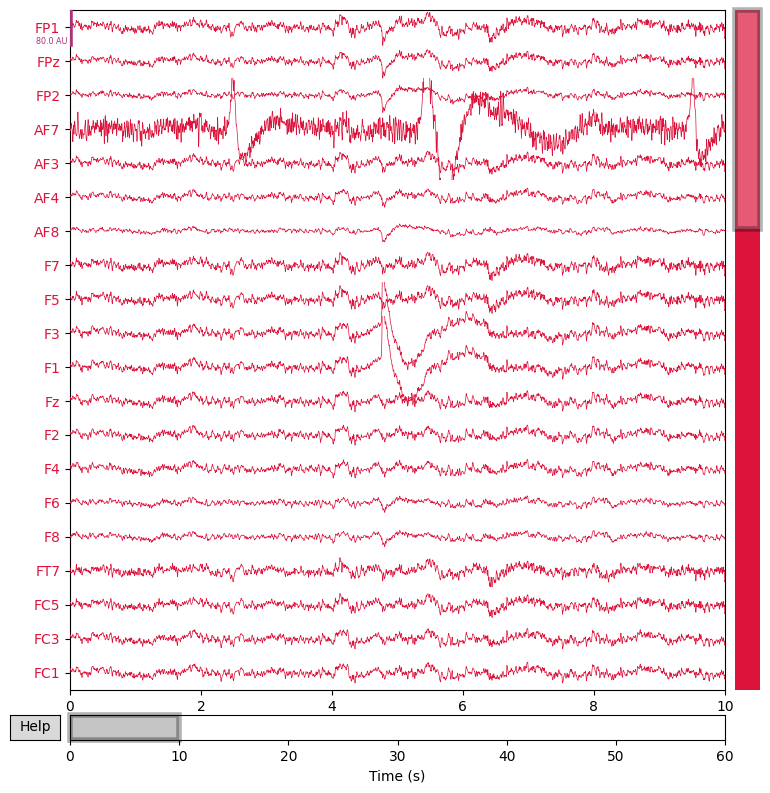

In [32]:
eeg_cropped.plot()

Probando método remove_segment()

In [33]:
raw_nuevo = eeg_raw_filtrado.remove_segment(420, 430) #mas o menos donde se unen los dos registros

In [34]:
raw_nuevo.data.shape

(62, 382927)

In [35]:
raw_nuevo.anotaciones.get_anotations() #el evento numero 21 ahora empieza "antes", toda la señal luego de ese evento se corrió en el tiempo

,onset,duration,description
0,37.548828,5,IZQUIERDA
1,54.048828,5,DERECHA
2,70.482422,5,DERECHA
3,88.632812,5,DERECHA
4,104.984375,5,IZQUIERDA
5,122.300781,5,IZQUIERDA
6,140.085938,5,DERECHA
7,157.287109,5,DERECHA
8,173.853516,5,DERECHA
9,190.685547,5,DERECHA
